#                        A CASE STUDY IN TIME SERIES ANALYSIS IN PYTHON

## GLOBAL TEMPERATURE MEASUREMENT:
Global average temperature measurement is very important in determining the changes that occur over time in the surface temperature of Earth. Global average temperature calculations are made by combining land and sea temperature data. However, the results are given as temperature anomalies, not absolute temperature values. The temperature anomaly can be defined as the temperature difference that occurs above and below the average temperature value.
   
There are three centers in the world that measure the average global temperature, and these centers use different data analysis methods. These are: 
* HadCRUT, which evaluates the data obtained by the UK National Meteorology Center (Met Office) 
* The University of Eastern Anglia, NOAA NCDC named analysis methods for assessing data obtained by the NASA GLISS 
* The US National Oceanic and Atmospheric Administration, where the data obtained by the NASA Goddard Space Research Center are evaluated.

Temperature datas of lands are obtained by measuring the temperature of the air above the surface of the land and measurements are usually made by meteorological stations. In sea surface temperature measurements, buoys and boats are mostly used. From time to time, the data obtained from the satellites can be included in calculations. 

The spherical mean temperature calculations are divided into surface areas (these dimensions are for HadCRUT and NOAA NCDC analysis methods, 5 Â° latitude-5 Â° longitude and for NASA GLISS analysis method, 2 Â° latitude-2 Â° longitude squares). The temperatures of these areas are determined by the average of the data obtained from the stations above them.

The biggest problem with global average temperature calculations is that the number of data and measurement stations is small (for example, polar regions and deserts). In HadCRUT analysis methods, regions where data can not be obtained are not included in the calculations. In NASA GISS and NOAA NCDC methods, these data gaps are filled in by statistical calculations.

### GLOBAL TEMPERATURE DATASET:(GlobalTemperatures.csv)

Kaggle have reloaded the data from a newer compilation collected by Berkeley Earth at the Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is packaged and allows you to enter interesting subgroups (for example, by country).Kaggle publish source data and code for the transformations they apply. They also use methods that allow air observations from shorter time series; this indicates that less observation is required.


The dataset uploaded from Kaggle includes global monthly mean temperature data in degrees Celsius from 1750-01-01 to 2015-12-01. It has 3192 rows and 9 columns. These columns: 
* Date
* LandAverageTemperature
* LandAverageTemperatureUncertainty
* LandMaxTemperature
* LandMaxTemperatureUncertainty
* LandMinTemperature
* LandMinTemperatureUncertainty
* LandAndOceanAverageTemperature
* LandAndOceanAverageTemperatureUncertainty
,respectively.


#### The plot of dataset is shown in the figure:

![datafig.png](datafig.png)


#### Description of dataset:

| COLUMNS       | DESCRIPTION   | TYPE  |ORDER|
| ------------- |---------------|-------|-----|
| DATE          |Date starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures|DateTime|1|
| LandAverageTemperature|This column gives information about global average land temperature in degrees Celsius.|Numeric|2|
| LandAverageTemperatureUncertainty|This column gives information about the 95% confidence interval around the average.|Numeric|3|
| LandMaxTemperature|This column gives information about global average maximum land temperature in degrees Celsius.|Numeric|4|
| LandMaxTemperatureUncertainty|This column gives information about the 95% confidence interval around the maximum land temperature.|Numeric|5|
| LandMinTemperature|This column gives information about global average minimum land temperature in degrees Celsius.|Numeric|6|
| LandMinTemperatureUncertainty|This column gives information about the 95% confidence interval around the minimum land temperature.|Numeric|7|
| LandAndOceanAverageTemperature|This column gives information about global average land and ocean temperature in degrees Celsius.|Numeric|8|
| LandAndOceanAverageTemperatureUncertainty|This column gives information about the 95% confidence interval around the global average land and ocean temperature.|Numeric|9|

#### Descriptive statistics for each column according to order of table above:

|         | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |                                   
|---------|---|---|---|---|---|---|---|---|
|count    |3180|3180|1992|1992|1992|1992|1992|1992|
|mean     |8.3747|0.9384|14.3506|0.4797|2.7435|0.4318|15.2125|0.1285|
|std	  |4.3813|1.0964|4.3095|0.5832|4.1558|0.4458|1.2740|0.0735|
|min	  |-2.0800|0.0340|5.9000|0.0440|-5.4070|0.0450|12.4750|0.0420|
|25%	  |4.3120|0.1867|10.21200|0.1420|-1.3345|0.1550|14.0470|0.0630|
|50%	  |8.6105|0.3920|14.7600|0.2520|2.9495|0.2790|15.2510|0.1220|
|75%	  |12.5482|1.4192|18.4515|0.5390|6.7787|0.4582|16.3962|0.1510|
|max	  |19.0210|7.8800|21.3200|4.3730|9.7150|3.4980|17.6110|0.4570|

In [1]:
import pandas as pd 
from scipy import stats
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
from stldecompose import decompose
from pyramid.arima import auto_arima
from pyramid.arima import ARIMA
import statsmodels
#import imsl.timeseries.auto_arima as auto_arima
pd.options.display.mpl_style = 'default'
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data=pd.read_csv("GlobalTemperatures.csv",sep=",") 
global_temp = data[["dt","LandAverageTemperature"]] 

* Only 'dt' and 'LandAverageTemperature' columns were taken from the dataset in this process. Now, it must be checked if 'LandAverageTemperature' column has any 'NaN' values. For this issue, '.isnan()' method is used and for using of this method 'Math' library must be imported. ('NaN' is standing for 'Not a Number'.)

In [3]:
total=0
for i in range(0,len(global_temp)):
    if (math.isnan(global_temp["LandAverageTemperature"][i])):
        total=total+1
total

12

When the codes were runned,it has been seen the column had 12 'NaN' values.Instead of dropping NaN values,to interpolate these values is more efficient. For this,'.interpolate(method='akima')' method were used. 
   ### AKIMA INTERPOLATION: 
- The interpolation method by Akima uses a continuously differentiable sub-spline built from piecewise cubic polynomials. The resultant curve passes through the given data points and will appear smooth and natural.There is no need to solve large equation systems and therefore this interpolation method is computationally very efficient. Because no functional form for the whole curve is assumed and only a small number of points is taken into account this method does not lead to unnatural wiggles in the resulting curve. The monotonicity of the specified data points is not necessarily retained by the resulting interpolation function. By additional constraints on the estimated derivatives a monotonicity preserving interpolation function can be constructed.<br>
- For a set of data points

$s_i$ = $s(x_i)$,        1 $ \leq$ i $ \leq$ k,(B1)
the interpolation function is defined as

s(x) = $a_0$ + $a_1$ . (x - $x_i$) + $a_2$ . $(x - x_i)^2$ + $a_3$ . $(x - x_i)^3$,        $x_i$ $ \leq$ x $ \leq$ $x_{i + 1}$.	(B2)

To determine the coefficients a0, a1, a2, and a3 of the interpolation polynomial for each interval [xi, xi + 1] the function values si and si + 1, and the first derivatives si' and si + 1' at the end points of the interval are used.

The first derivative $s_i$' of the interpolation function at $x_i$ is estimated from the data for this point and the next two points on each side of $x_i$. Using the ratios

dj = $ {\frac{s_{j+1} - s_{j}}{x_{j+1} - x_{j}}}$,        j = i - 2, i - 1, i, i + 1,	(B3)

and the weighting coefficients

$w_{i - 1}$	= | di + 1 - di|,	(B4)<br>
$w_i$	= | di - 1 - di - 2|, (B5)<br>
the estimated derivative si' is defined as

- $s_i$' = $ {\frac{w_{i - 1}\cdot d_{i - 1} + w_{i}\cdot d_{i}}{w_{i - 1} + w_{i}}}$.	(B6)<br>

Several special cases for $s_i$' have to be considered.

- $s_i$'	= $d_{i - 1}$	 ,        $d_{i - 2}$ = $d_{i-1}$, di $\neq$ di + 1	(B7)<br>
- $s_i$'	= $d_i$	 ,     $d_i$ = $d_{i + 1} $, $d_{i - 2}$ $\neq$ $d_{i - 1}$	(B8)<br>
- $s_i$'	= $d_{i - 1}$ = $d_i$	 	        $d_{i - 1}$ = $d_i$	(B9) <br>
- $s_i$'  = ${\frac{d_{i - 1} + d_{i}}{2}}$	 	 , $d_{i - 2}$ =$d_{i - 1}$ $\neq$ $d_i$ =$ d_{i + 1}$	(B10)

To be able to use (B.6) for calculating the derivatives s1', s2', sk - 1', and sk' additional ratios d-1, d0, dk, and dk + 1 have to be estimated.

- $d_1$	= 2 . $d_0$ - $d_1$	(B11)<br>
- $d_0$	= 2 . $d_1$ - $d_2$	(B12)<br>
- $d_k$	= 2 . $d_{k - 1}$ - $d_{k - 2}$	(B13)<br>
- $d_{k + 1}$	= 2 . $d_k$ - $d_{k - 1}$	(B14)<br>

The order of the interpolation function reduces to 2 for these intervals.

In [4]:
global_temperature = global_temp.interpolate(method = 'akima')
total=0
for i in range(0,len(global_temp)):
    if (math.isnan(global_temperature["LandAverageTemperature"][i])):
        total=total+1
total

0

- Since the dataset is too large, we split into two pieces. And then ,we get a dataframe from pandas module while reading our csv file, but index of dataframe is date and we have to convert it to datetime. For this,the process is :

In [5]:
global_split=np.array_split(global_temperature,2)
global1=global_split[0]
global2=global_split[1]

In [6]:
global1.reset_index(inplace=True)
global1['dt'] = pd.to_datetime(global1['dt'])
global1 = global1.set_index('dt')

#for global2
global2.reset_index(inplace=True)
global2['dt'] = pd.to_datetime(global2['dt'])
global2 = global2.set_index('dt')
 
add_decompose = sm.tsa.seasonal_decompose(global2["LandAverageTemperature"])
mul_decompose = sm.tsa.seasonal_decompose(global2["LandAverageTemperature"],model = 'multiplicative')
stl_decompose = decompose(global2["LandAverageTemperature"],period=12)

# STL:A Seasonal-Trend Decomposition Procedure Based on Loess

###### STL is a filtration procedure to decompose a time series into trend,seasonal,and remainder component. 
<br>
$ Y_{v} = T_{v} + S_{v} + R_{v} $  (T:trend , S:seasonal , R:remainder) for v = 1 to N
<br>
###### The aim of the STL is to enhance a decomposition procedure and a companion application that provide the following interdependent criteria:
<br>

- Easy to design and to use, 
- Flexibility in specifying the amounts of variation in the trend and seasonal components,
- Specification of the number of observations per loop of the seasonal component to any integer greater than 1,
- The decomposing ability to series with NaN values,
- Robust trend and seasonal components that are not distorted by transient,aberrant behavior in the data,
- Easy computer implementation and fast computation,even for long time series.<br>

#####  In this figure,we see the decomposition: 
![decomposition.jpg](decomposition.jpg)

###### STL includes many parameters that must be picked by the data analyst. For some parameters,a priori prescribed values can be used. The choices of the other parameters have to be based upon the specialities of the data;diagnostic methods are given that help the data analyst to make these choices.
#### LOESS:
- We assume that $ x_{i} $  and $ y_{i} $ for i=1 to N are measurements of an independent and dependent variable,respectively. The Loess regression curve,$ \hat {g} $(x),is a smoothing of y given x that could be calculated for any value of independent variable along the scale of x. Loess is not only defined at $x_{i}$ but also defined everywhere. This is an excellent property that in STL let us to handle these missing values and detrend the seasonal component in a straightforward way.
- Loess can also be used to smooth dependent variable y as a function of any number of independent variables;however,for STL the case has only one independent variable.
###### $\hat{g} $(x)  is calculated in the following way:
- Firstly,we choose a positive integer q and assume that q $ \leq $ n. And then we choose q values of the $x_{i}$ which are closest to independent variable x and each of them is given a "neighborhood weight" based upon its distance from x. Let $\lambda_{q}$(x) be distance of the $q th$ farthest from x. Let $W$ be the tricube weight function: <br> $W$(u) $=$  $$\begin{cases} 
      (1-u^3)^3& ,0 \leq x < 1 \\
      0 & ,1\geq x 
   \end{cases}$$ <br>
* The neighborhood weight for any $x_{i}$ is: <br> $v_i = $ W($\frac{|x_i - x|}{\lambda_{q}(x)}$) <br>

- So $x_i$ close to x have the biggest weights;the weights go down as the $x_i$ go up in distance from x and become zero at the $qth$ farthest point. The following step is to fit a polynomial of degree 'd' to the data with weight $v_i$(x) at ($x_i$,$y_i$)

* Now, we assume that q $>$ n. $\lambda_{n}$(x) is the distance from x to the farthest $x_i$. For q $ > $ n we define $\lambda_{q}$(x) by <br> $\lambda_{q}$(x) = $\lambda_{n}$(x)$\frac{q}{n}$

### The Overall Design: Inner and Outer Loops:

- STL includes two recursive procedures: an inner loop nested inside an outer loop. Firstly:

#### The Inner Loop:
- Each pass from inner loop includes a seasonal smoothing that updates the seasonal component, followed by a trend smoothing that updates the trend component,and this process(each complete run) has $n_{(i)}$ such passes. <br> Let $S_{v}^k$ and $T_{v}^k$ be the seasonal and trend components at the end of the $kth$ pass. (v = 1 to N) These components are defined not only where $Y_v$ is defined but also where $Y_v$ is not defined , which means these are defined at all times v = 1 to N. The next update-$(k+1)st$- is calculated in the following way:<br>
<br>
- Step 1: $(Detrending)$: We calculate the $Y_v$-$T_v$ which is detrended series. If $Y_v$ is not defined at a particular time position,then $T_v$ could not be calculated for that position.<br> Suppose the number of the observations in each period,or cycle,of the seasonal component is $n_p$. $Cycle-subseries$ refer to each of these $n_p$ subseries.<br>
<br>
- Step 2: $(Cycle-subseries$ $  Smoothing)$:Each cycle-subseries of the detrended series is smoothed by Loess with q = $n_s$ and d=1.We calculate smooth values for all time positions of the cycle-subseries,including where $Y_v$ is not defined and at positions prior to the first time position of the cycle-subseries and after the last.<br>
<br>
- Step 3: $(Low-pass$ $ Filtering$  $ of$  $ Smoothed$ $ Cycle-subseries)$:We apply the "low-pass filter" to $C_v^{(k+1)}$.The filter includes a moving average of length $n_p$,followed by another moving average of length $n_p$,followed by a moving average of length 3,followed by a Loess smoothing with d = 1 and q = $n_l$. <br>
<br>
- Step 4: $(Detrending$ $of$ $ Smoothed$ $Cycle-subseries)$ :$(k+1)st$ loop is $S_v^{(k+1)}$ = $C_v^{(k+1)}$ - $L_v^{(k+1)}$ for v=1 to N. $L_v^{(k+1)}$ is subtracted to prevent low-frequency power from entering the seasonal component.<br>
<br>
- Step 5: $(Deseasonalizing)$: We calculate the $Y_v$-$S_v^{(k+1)}$ which is deseasonalized series. If $Y_v$ is not defined at a particular time position,then $S_v$ could not be calculated for that position.<br>
<br>
- Step 6: $(Trend$ $ Smoothing)$: Loess with q=$n_t$ and d = 1 smooths the deseasonalized series.We calculate smooth values at all time positions for v= 1 to N even where $Y_v$ has missing values.The trend component from $(k+1)st$ loop ,$T_v^{(k+1)}$ for v=1 to N, is the set of smooth values. 

#### The Outer Loop:
- Assume that we have executed an initial run of the inner loop to determine,$T_v$ and $S_v$,of the trend and seasonal components. Then the remainder is: <br> $R_v$ = $Y_v$-$T_v$-$S_v$ <br> $R_v$ is not defined where $Y_v$ has missing values,unlike $T_v$ and $S_v$ .We define a $weight$ for each time point where $Y_v$ is observed. These $robustness$ $weights$  reflect how extreme $R_v$ is.An outlier in the data that results in a very large $|R_v|$ has a small or zero weight.Suppose that : h = 6 median(|$R_v$|) , then the robustness weight at time point $v$ is: <br> $p_v$ = B($\frac{|R_v|}{h}$) where B is the bisquare weight function:<br> $B(u) = $ $$\begin{cases} 
      (1-u^2)^2& ,0 \leq x < 1 \\
      0 & ,1\geq x 
   \end{cases}$$ <br>
- In this process,the inner loop is repeated;however,the neighborhood weight for a value at time $v$ is multiplied by the robustness weight $p_v$,in the smoothings of step 2 and 6.A total $n_o$ times we apply these robustness iterations of the outer loop . We do not put the value of $T_v^{(0)}$ is 0 each time we go into the inner loop after the initial pass,instead of it we use the trend component from step 6 of the earlier inner loop.  
### Choosing the STL Parameters:
* STL has 6 parameters. These are:$n_p$,$n_i$,$n_o$,$n_l$,$n_s$,$n_t$.<br>
-- $n_p$: The number of observations in each cycle of the seasonal component.<br>
-- $n_i$: The number of passes through the inner loop. <br>
-- $n_o$: The number of robustness iterations of outer loop. <br>
-- $n_l$: The smoothing parameter for the low-pass filter. <br>
-- $n_t$: The smoothing parameter for the trend component.<br>and<br>
-- $n_s$: The smoothing parameter for the trend component. <br>
![fig3.jpg](fig3.jpg)
-- We see in the figure STL parameters as:<br>$n_p$=12  ,  $n_i$=2  ,  $n_o$=0  ,  $n_l$=13  ,  $n_t$=19  ,and $n_s$=35.<br>
## i) $\underline{n_p}$:
<br>
- This parameter is choosen as number of observations in each cycle. For example,if the data has yearly periodicity,then $n_p$ is 365 for the daily data,$n_p$ is 12 for the monthly data. 
## ii) $\underline{n_i}$ and $\underline{n_o}$:
<br>
- STL robust estimations is necessary that when prior knowledge of the data or diagnostic controlling points out that non-Gaussian behavior in the time-series causes extreme and transient variation. If there are not these variations,then we neglect robustness iterations and and set $n_o$ = $0$. For example in the first figure,$n_o$ = $0$ because of not existing aberrant behavior. Firstly,we assume that no robustness. We want to choose $n_i$ large enough because of updating the seasonal and trend components converges. In many cases,we pick as $n_i$ = 1, but in some cases we choose $n_i$ = 2 because of providing near certainty of convergence.<br> Now,we assume that we need robustness iterations and we want to pick $n_o$ is large enough because of robust estimates the seasonal and trend components converges. For doing this,there are 2 reasons for always choosing as $n_i$ = 1. The first one is the convergence of inner loop is very rapid. The second one has to do with a general principle of unconstrained optimization when there are nested iterations.<br>
$\frac{max|U_v^{(k)}-U_v^{(k+1)}|}{maxU_v^{(k)}-minU_v^{(k+1)}}$ $< 0.01$  <br>This is the convergence criterian and stop criterion and stop the iterations when the criterion is satisfied. (Suppose that $U_v^{(k)}$ and $U_v^{(k+1)}$ are successive iterates of either a trend or seasonal component.)
## iii) $\underline{n_l}$:
<br>
* $n_l$ is always taken to be equal to the least odd integer greater than or equal to $n_p$. This choice of $n_l$ enable to prevent competing of variation in the data of seasonal and trend components. For example,in the second figure,$n_l$ is 13.  
## iv) $\underline{n_s}$:
<br>
* As the seasonal smooth parameter $n_s$ increases,each cycle-subseries becomes smoother. we always want to choose as $n_s$ is odd and also is at least 7. The choice of $n_s$ adjusts the variation in the data that generates the seasonal component and to pick proper variation depends on the characteristics of series.
![fig8.jpg](fig8.jpg)
- This figure is the sample of diagnostic graphical method that can assist the choice of $n_s$.Each panel of the figure graphs two sets of values for a particular month. Let $\bar{s}_k$ be the mean of the values of the cycle-subseries of the seasonal component for the $k-th$ month. The curve on the panel for the $k-th$ month graphs those seasonal values minus their mean $\bar{s}_k$. The circles graph the values of the $k-th$ cycle-subseries of the seasonal plus the remainder,also with $\bar{s}_k$ subtracted.(The reason for subtracting $\bar{s}_k$ is to center the values on each panel at zero.) This diagnostic method is $seasonal-diagnostic$ $plot$.This helps us to decide how much of the variation in the data other than trend should go into the seasonal component and how much into the remainder.
## v) $\underline{n_t}$:
<br>
- As the trend smoothing parameter $n_t$ increases,the trend component $T_v$, extracts less variation $X_v$ and becomes smoother. If a component is necessary for describing certain low-frequency variation in the data,then we apply a $post-trend$ $smoothing$,which means a low pass filter like Loess,is carried out to $T_v$ + $R_v$,the data with the seasonal component removed,to get a component with the intended variation.<br> And we choose $n_t$ in this way::
$n_t$ $\geq$ $\frac{1.5n_p}{1-1.5n_p^{-1}}$ 

## ADDITIVE DECOMPOSITION

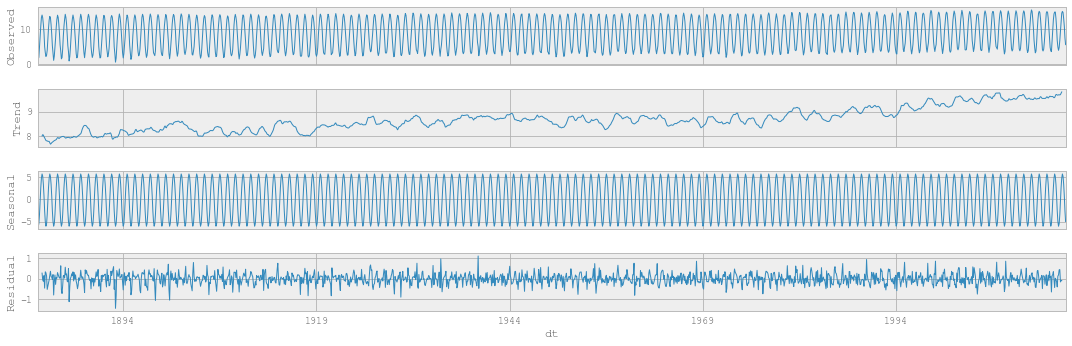

In [7]:
fig= add_decompose.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()

#### If I plot the add_decompose,I'll show these plots;
- The first picture is my dataset's plot
- The second picture is trend on my dataset
- The third picture is seasonal effect on my dataset
- The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset.

## MULTIPLICATIVE DECOMPOSITION

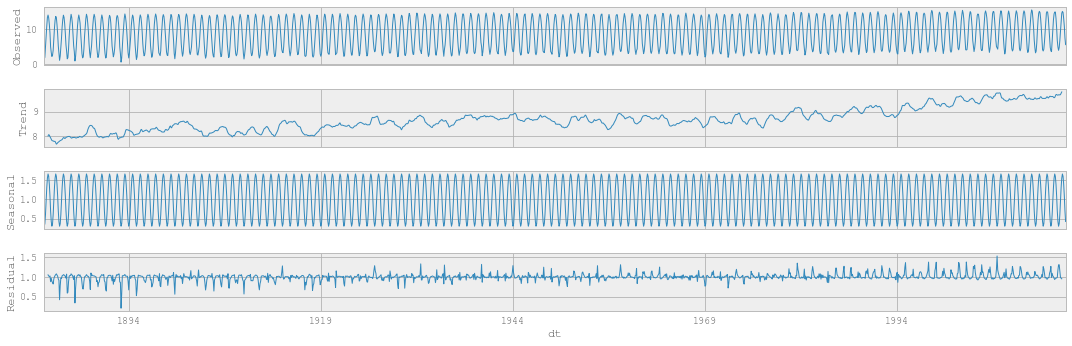

In [8]:
fig= mul_decompose.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()

#### If I plot the mul_decompose,I'll show these plots;
- The first picture is my dataset's plot
- The second picture is trend on my dataset
- The third picture is seasonal effect on my dataset
- The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset.

## STL DECOMPOSITION

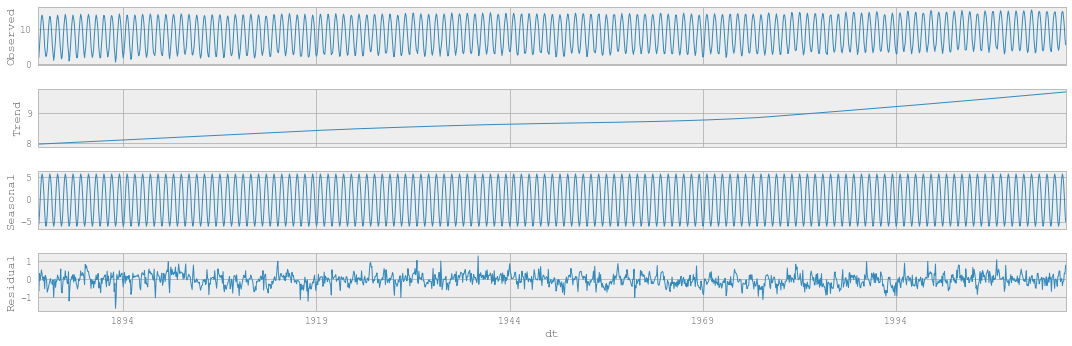

In [9]:
fig= stl_decompose.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()

#### If I plot the stl_decompose,I'll show these plots;
- The first picture is my dataset's plot
- The second picture is trend on my dataset
- The third picture is seasonal effect on my dataset
- The last picture is residual plot, which is remaining data after all effects are eliminated on original dataset.

###  ADDITIVE-MULTIPLICATIVE AND STL DECOMPOSITION:
- When i have applied all decompositions on my dataset , I observed same seasonality on STL and Additive decomposition. When I splitted my dataset into four pieces and applied additive decomposition on them,I observed also same seasonality. So I use only additive decomposition instead of STL. Moreover, the reason of applying Multiplicative decomposition is to compare additive and multiplicative decompositions. 

#  ACF-PACF
- ACF(n=number of time periods between points)is correlation between points separated by n time periods. For instance, ACF(0)=1 (all data are perfectly correlated with themselves), ACF(1)=.9 (the correlation between a point and the next point is 0.9), ACF(2)=.4 (the correlation between a point and a point two time steps ahead is 0.4)<br>So,he ACF tells you how correlated points are with each other, based on how many time steps they are separated by. That is the gist of autocorrelation, it is how correlated past data points are to future data points, for different values of the time separation.

- PACF gives information about the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.<br>Given a time series $Z_t$,the partial autocorrelation of lag k,denoted $a(k)$,is the autocorrelation between $Z_t$ and $Z_{t+k}$ with the linear dependence of $Z_t$ and $Z_{t+1}$ through $Z_{t+k-1}$ removed ;equivalently,it is the correlation between $Z_t$ and $Z_{t+k}$,that is not accounted for by lags 1 to k-1,inclusive.<br>$a(1)=Corr(Z_t,Z_{t+1})$<br>$a(k)=Corr(Z_{t+k}-P_{t,k}(Z_{t+k}),Z_t-P_{t,k}(Z_{t}))$

## ACF-PACF FOR ADDITIVE MODEL

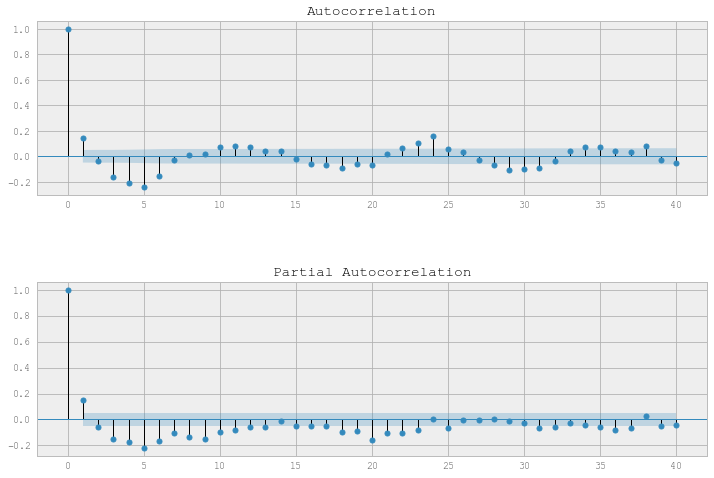

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(add_decompose.resid.dropna(), lags=40 , ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(add_decompose.resid.dropna(), lags=40, ax=ax2)
plt.show()

- In above plots, we show that in autocorrelation function:the last lag that intersects the significant region is 7th lag. It means for MA() model we should choose the q parameter in this way. But  to choose parameter for ARIMA with observations can be difficiult and not efficient.and for partial autocorrelation function : the last lag that intersects the significant region is 2nd lag. This PACF test says that about AR() model-p parameters. But we will determine order with auto_arima.   

## ACF-PACF FOR MULTIPLICATIVE MODEL

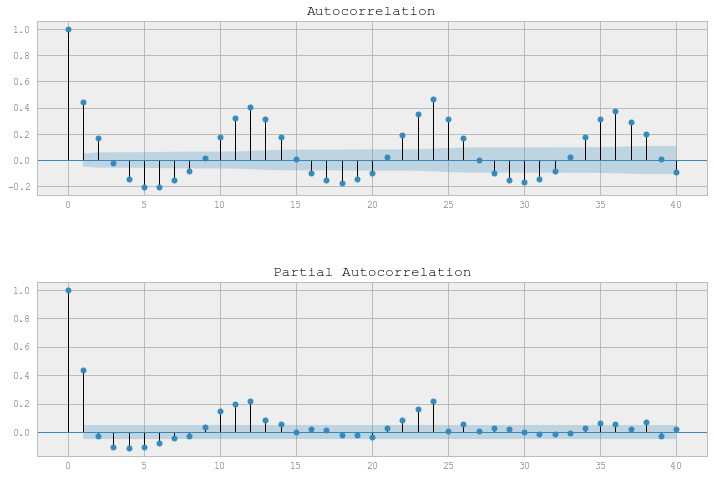

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mul_decompose.resid.dropna(), lags=40 , ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mul_decompose.resid.dropna(), lags=40, ax=ax2)
plt.show()

- In above plots, we show that in autocorrelation function:the last lag that intersects the significant region is 8th lag. It means for MA() model we should choose the q parameter in this way. But  to choose parameter for ARIMA with observations can be difficiult and not efficient.and for partial autocorrelation function : the last lag that intersects the significant region is 2nd lag. This PACF test says that about AR() model-p parameters. But we will determine order with auto_arima.

## ACF-PACF FOR STL MODEL

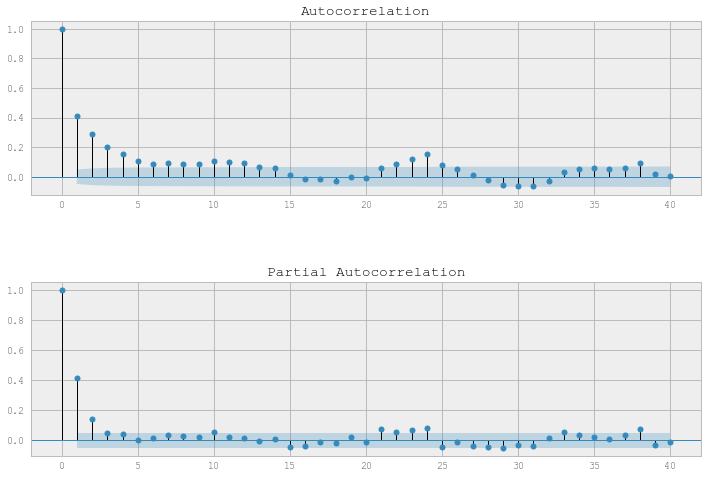

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stl_decompose.resid.dropna(), lags=40 , ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stl_decompose.resid.dropna(), lags=40, ax=ax2)
plt.show()

In [13]:
add_decomposition = add_decompose.resid
mul_decomposition = mul_decompose.resid
stl_decomposition = stl_decompose.resid

# ARIMA 
- ARIMA model is the model that non-stationary but converted to stationary with difference operation. These models(non-stationary but converted to stationary with difference operation) are called 'non-stationary linear stochastical models'. These models are composed of AR and MA models with differentiated degree of d.The AR model is expressed as a linear function of the value of variable at t-period and preceding period values with error terms in same period and the MA model is expressed as a linear function of the value of the variable at t-period and error terms at both preceding period and same period.We generalize the ARIMA MODEL(p,d,q)'s formula as:
<br>$Z_t = Φ_1.Z_{t-1}+ Φ_2.Z_{t-2}+...+Φ_p.Z_{t−p}+δ+a_t-Θ_1.a_{t-1}-Θ_2.a_{t-2}-...-Θ_p.a_{t-p}$
<br> In this formula:
- $Z_t,Z_{t-1},Z_{t-2},...,Z_{t-p}$ refers to observed values that are differentiated by d-degrees.
- $Φ_1,Φ_2,Φ_3,...,Φ_p$ refers to coefficients of corresponding observed values that are differentiated by d-degrees.
- $δ$ refers to constant.
- $a_t,a_{t-1},a_{t-2},...,a_{t-p}$ refers to error terms.
- $Θ_1,Θ_2,Θ_3,...,Θ_p$ refers to coefficients of corresponding error terms.

##### Stationary and Non-stationary model:
- A stationary process has the property that the mean, variance and autocorrelation structure do not change over time and non-stationary process does not . In the figure below we can see the difference between them clearly.
![seasonality.png](seasonality.png)
(The plot on the left is stationary with no obvious trend while the plot on the right shows seasonality and is non-stationary.)
#### The p,d,q parameters of ARIMA:
- $p$: is the order (number of time lags) of the autoregressive model,
- $d$: is the degree of differencing (the number of times the data have had past values subtracted),
- $q$: s the order of the moving-average model. 

#### Differencing: Differencing is used for transforming the data to stationary and to do differencing the difference between consecutive observations is computed,i.e, : <br>
$Y_t^{'} = Y_t-Y_{t-1}$
<br> Sometimes,we have to difference twice. In this process,
<br>$Y_t^{*} = Y_t^{'}-Y_{t-1}^{'}$(i) We know already $Y_t^{'} = Y_t-Y_{t-1}$ and $Y_{t-1}^{'} = Y_{t-1}-Y_{t-2}$ equations and we get by plugging into (i):<br>
$Y_t^{*} = (Y_t-Y_{t-1})-(Y_{t-1}-Y_{t-2})$
$Y_t^{*} = (Y_t-2.Y_{t-1}-Y_{t-2})$

#### Some examples of ARIMA model:
- ARIMA(0,1,0) model: 'random walk'
- ARIMA(0,1,0) model with constant: 'random walk with drift'
- An ARIMA(0,0,0) model: 'white noise model'
- An ARIMA(0,1,2) model: 'Damped Holt's model'
- An ARIMA(0,1,1) model without constant: 'basic exponential smoothing model'
- An ARIMA(0,2,2) model : 'Holt's linear method with additive errors'

### Choosing Order of ARIMA:
- We use a criterion (AIC) in order to determine order of ARIMA. <br>AIC: -Akaike Information Criterion- is written as:<br> $AIC = -2log(L)+2(p+q+k+1)$. [L is the likelihood of the data,p and q are the autoregressive parameter and the moving average parameter,respectively.] <br>and the other criterion we use is BIC(Bayesian Information Criterion) and it can be written as:<br>
$BIC = AIC + (log(T)-2)(p+q+k+1)$ 

## AUTO_ARIMA FOR ADD_DECOMPOSITION

In [83]:
stepwise_fit1 = auto_arima(add_decomposition.dropna(), start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=432.324, BIC=459.162, Fit time=13.618 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1525.511, BIC=1546.982, Fit time=5.914 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=435.401, BIC=456.872, Fit time=16.622 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=447.707, BIC=479.913, Fit time=22.529 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1388.854, BIC=1410.325, Fit time=10.868 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=398.209, BIC=430.415, Fit time=142.905 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=410.600, BIC=437.439, Fit time=75.660 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=544.809, BIC=582.383, Fit time=138.822 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(

- In order to choose optimal order for our model,we check AIC values. We want that absolute value of AIC is minimum. In this way we determine the order of our model. Auto_arima shows two orders. These orders: non-seasonal order and seasonal order. Eventhough we eliminated the seasonal effect,auto_arima gives us seasonal order. That means decomposition we applied is not efficient for our model. When we compare results for mul_decomposition optimal model is order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=389.393, BIC=426.967.

## AUTO_ARIMA FOR MUL_DECOMPOSITION

In [84]:
stepwise_fit2 = auto_arima(mul_decomposition.dropna(), start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-3600.596, BIC=-3573.757, Fit time=35.843 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-2716.486, BIC=-2695.015, Fit time=8.502 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-3556.258, BIC=-3534.787, Fit time=19.113 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-3601.327, BIC=-3569.121, Fit time=38.619 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-3306.348, BIC=-3279.510, Fit time=32.915 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-3518.747, BIC=-3481.173, Fit time=140.955 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-2723.758, BIC=-2702.287, Fit time=12.967 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=-3538.694, BIC=-3495.752, Fit time=153.857 seconds
Fit ARIMA: orde

- In order to choose optimal order for our model,we check AIC values. We want that absolute value of AIC is minimum. In this way we determine the order of our model. Auto_arima shows two orders. These orders: non-seasonal order and seasonal order. Eventhough we eliminated the seasonal effect,auto_arima gives us seasonal order. That means decomposition we applied is not efficient for our model. When we compare results for mul_decomposition optimal model is order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-2716.486, BIC=-2695.015.

## AUTO_ARIMA FOR STL_DECOMPOSITION

In [85]:
stepwise_fit3 = auto_arima(stl_decomposition.dropna(), start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=756.237, BIC=783.113, Fit time=50.439 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1524.131, BIC=1545.632, Fit time=16.864 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=808.935, BIC=830.436, Fit time=44.374 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=753.876, BIC=786.127, Fit time=38.235 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1246.081, BIC=1272.957, Fit time=22.971 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=742.996, BIC=780.623, Fit time=155.620 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=795.928, BIC=828.180, Fit time=102.519 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=731.418, BIC=774.420, Fit time=188.566 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order


- In order to choose correct order of ARIMA,we have to minimize AIC value. So we choose the ARIMA(1,1,1) is the best fit model. When we compare to AIC results, we see the ARIMA(1,1,1) is correct model for us.


In [14]:
MODEL1 = statsmodels.tsa.statespace.sarimax.SARIMAX(add_decomposition.dropna(),order=(1,1,1),seasonal_order=(1, 1, 2, 12))
MODEL2 = statsmodels.tsa.statespace.sarimax.SARIMAX(mul_decomposition.dropna(),order=(1,1,0),seasonal_order=(1, 1, 0, 12))

In [15]:
fitted_model1 = MODEL1.fit()
fitted_model2 = MODEL2.fit()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<h3>MODEL1 (ADDITIVE)</h3>

In [16]:
print(fitted_model1.summary())

                                 Statespace Model Results                                 
Dep. Variable:             LandAverageTemperature   No. Observations:                 1584
Model:             SARIMAX(1, 1, 1)x(1, 1, 2, 12)   Log Likelihood                -185.069
Date:                            Sun, 07 Jan 2018   AIC                            382.137
Time:                                    23:40:18   BIC                            414.344
Sample:                                07-01-1883   HQIC                           394.103
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0959      0.023      4.145      0.000       0.051       0.141
ma.L1         -0.9997      0.139   

<h3> MODEL2 (MULTIPLICATIVE) </h3>

In [17]:
print(fitted_model2.summary())

                                 Statespace Model Results                                 
Dep. Variable:             LandAverageTemperature   No. Observations:                 1584
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                1362.243
Date:                            Sun, 07 Jan 2018   AIC                          -2718.486
Time:                                    23:40:21   BIC                          -2702.383
Sample:                                07-01-1883   HQIC                         -2712.503
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3668      0.014    -26.050      0.000      -0.394      -0.339
ar.S.L12      -0.5562      0.015   

#### model1

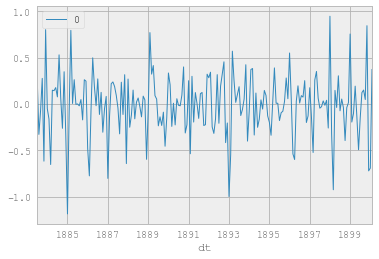

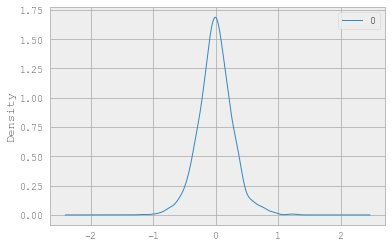

                 0
count  1584.000000
mean     -0.001660
std       0.274476
min      -1.186461
25%      -0.162045
50%      -0.002332
75%       0.160747
max       1.248531


In [18]:
# plot residual errors
residuals = DataFrame(fitted_model1.resid)
residuals.head(200).plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


In [19]:
#convert to standard normal dist.
residual1=(residuals-fitted_model1.resid.mean())/(fitted_model1.resid.std())

# KOLMOGOROV-SMIRNOV TEST
- The aim of the Kolmogorov-Smirnov test is to determine whether dataset comes from a indicated distribution and K-S test is based on the empirical distribution function(ECDF). Given N ordered data points $Y_1, Y_2, ..., Y_N$, the ECDF is defined as<br>$E_N=n(i)/N$ <br>where n(i) is the number of points less than $Y_i$ and the $Y_i$ are ordered from smallest to largest value. This is a step function that increases by 1/N at the value of each ordered data point. At given step function,each ordered value is increased by 1/N. 
![ecdf.gif](ecdf.gif)
- The plot above is the ECDC with a normal cumulative distribution function for 100 normal random numbers.The K-S test calculates maximum distance by using these two curves.
###  - Characteristics and Limitations of the K-S Test
- One of the most important characteristics of K-S test is whose distribution not being based on cumulative distribution function(cdf) tested. Another advantage is that it is an exact test. Despite these advantages, the K-S test has many significant limitations:<br>
- We can apply only to continous distributions.
- The biggest disadvantage of the K-S test is that we have to specify all parameters manually.
- K-S test is inclined to be more critical near the center compared to tails.

We define the K-S test as: <br> 
$H_0$:	The data follow a specified distribution.<br>
$H_a$:	The data do not follow the specified distribution.<br>
- Test Statistic:	The Kolmogorov-Smirnov test statistic is defined as<br>
$   D = max \left( F(Y_{i}) -
               \frac{i-1} {N}, \frac{i}{N} - F(Y_{i}) \right) $ ,for $0\le i \le 1$ , where F is the theoretical cdf tested.<br> 
<br>In this way,K-S test enables to determine whether the data comes from these distributions:
   - Normal Distribution,
   - Log-normal Distribution,
   - Weibul Distribution,
   - Exponential Distribution,
   - Logistic Distribution
<br>
<br>I want to learn my residual data that comes from ARIMA model is distributed as normal or not.For this, I specify the model parameter as $'norm'$ and data parameter as $residual$ .

In [20]:
data1_normality=stats.kstest(residual1,'norm')#ADDITIVE

In [29]:
data1_normality

KstestResult(statistic=0.99999737851251103, pvalue=0.0)

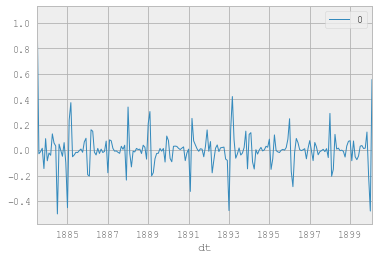

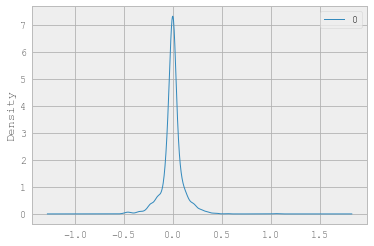

                 0
count  1584.000000
mean      0.000304
std       0.105863
min      -0.502020
25%      -0.032941
50%       0.000746
75%       0.031548
max       1.052304


In [22]:
# plot residual errors
residuals = DataFrame(fitted_model2.resid)
residuals.head(200).plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [23]:
residual2=(residuals-fitted_model2.resid.mean())/(fitted_model2.resid.std())
data2_normality=stats.kstest(residual2,'norm')
data2_normality

KstestResult(statistic=1.0, pvalue=0.0)

## RESULT:
##### Up to now,we used these methods in order to eliminate any effects on our dataset or determine some parameters of our methods:
- Decomposition,
- ACF-PACF,
- SARIMAX.
Firstly,by decomposition,we eliminated seasonal and trend effects on dataset and got residuals. Then,applied ACF-PACF test for two models(additive-multiplicative). After we have removed all the effects we can,we used SARIMAX Model.To use of this model,we have to decide non-seasonal order and seasonal order with auto_arima. Auto_arima said that for the additive model:non-seasonal order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=389.393, BIC=426.967(We picked these orders since they had the least AIC value.) And for the multiplicative model auto_arima said that:non-seasonal order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-2716.486, BIC=-2695.015.(We have choosen these orders since they had the least absolute value of AIC.)Now,before deciding which model is the best for the dataset,we used SARIMAX model with non-seasonal order and seasonal order. The reason for the seasonal order at auto_arima is that decomposition did not work well. That's why we used SARIMAX. After we used SARIMAX and fitted,we got residuals and we wanted to know whether residual data noise data or not. To decide this, we have to know the residuals distribute normally. And for this we used K-S test(Kolmogorov-Smirnov) In this process,we converted residuals to standard normal.((residuals-mean)/std) According to K-S test,resulting p-values showed that both model(additive-multiplicative) is not normal distribution. It means both are not noise data,they still have informations in them.



- Wee see that after we decompose the dataset,when we use ARIMA we do not get efficient result. In order to check seasonality without decomposing the dataset,we only use ARIMA method to dataset. For this,firstly we have to determine order of ARIMA and that is why we use auto_arima. Auto_arima gives us non-seasonal and seasonal order if there exists. 


#### Original Dataset :
- We see that decomposition does not work well. Since it does not,we will use only ARIMA model on our dataset. For this,firstly we have to determine our orders(non-seasonal order and seasonal order). Since we do not eliminate seasonal effect before ARIMA(eventhough we use seasonal decomposition,we got this seasonal order) we have to get seasonal order within non-seasonal order.

In [24]:
stepwise_fit3 = auto_arima(global2["LandAverageTemperature"], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=756.545, BIC=783.422, Fit time=11.702 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1524.137, BIC=1545.638, Fit time=4.782 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=809.013, BIC=830.514, Fit time=13.210 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=754.156, BIC=786.408, Fit time=26.313 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1246.112, BIC=1272.988, Fit time=8.244 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=744.823, BIC=782.450, Fit time=68.132 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=794.598, BIC=826.850, Fit time=63.741 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=726.596, BIC=769.598, Fit time=83.173 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 

In [25]:
MODEL3 = statsmodels.tsa.statespace.sarimax.SARIMAX(add_decomposition.dropna(),order=(2,1,1),seasonal_order=(1, 1, 2, 12))

In [26]:
fitted_model3=MODEL3.fit()

In [27]:
print(fitted_model3.summary())

                                 Statespace Model Results                                 
Dep. Variable:             LandAverageTemperature   No. Observations:                 1584
Model:             SARIMAX(2, 1, 1)x(1, 1, 2, 12)   Log Likelihood                -178.188
Date:                            Mon, 08 Jan 2018   AIC                            370.377
Time:                                    00:12:41   BIC                            407.950
Sample:                                07-01-1883   HQIC                           384.336
                                     - 06-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.023      4.549      0.000       0.059       0.149
ar.L2         -0.0966      0.024   

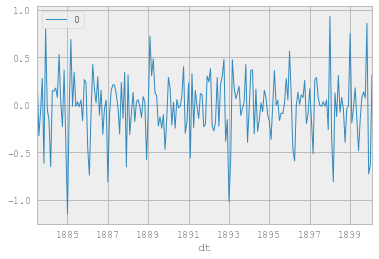

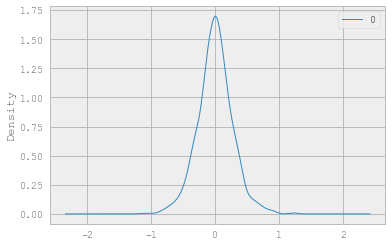

                 0
count  1584.000000
mean     -0.001738
std       0.273130
min      -1.151489
25%      -0.160371
50%      -0.001943
75%       0.155433
max       1.223174


In [28]:
residuals = DataFrame(fitted_model3.resid)
residuals.head(200).plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [30]:
residual3=(residuals-fitted_model3.resid.mean())/(fitted_model3.resid.std())

In [32]:
data3_normality=stats.kstest(residual3,"norm")

In [33]:
data3_normality

KstestResult(statistic=0.99999634957481798, pvalue=0.0)

- As a result,according to K-S test our remainder is not distributed normally which means our remainder is not white noise dataset. So,the dataset has still information in it. 

## SOURCES:
- http://www.statsmodels.org
- Time Series Analysis and Its Applications (Robert Shumway,David Stoffer)
- Journal of Official Statistics(Robert Cleveland,William Cleveland)
- http://bilimgenc.tubitak.gov.tr
- https://data.giss.nasa.gov/gistemp/
- https://people.duke.edu/
- http://dergipark.gov.tr
- https://github.com/fonnesbeck/statistical-analysis-python-tutorial

- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

- https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c

- http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
- Box, G. E. P.; Jenkins, G. M.; Reinsel, G. C. (2008). Time Series Analysis, Forecasting and Control 
- Brockwell, Peter; Davis, Richard (2009). Time Series: Theory and Methods 